<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/Decision-Tree/DT_Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification using Decision trees

**Context**

This dataset contains information about the obesity classification of individuals. The data was collected from a variety of sources, including medical records, surveys, and self-reported data


**Objective:**

To develop a decision tree model that accurately predicts the obesity classification of individuals.


**Data Dictionary:**

ID: A unique identifier for each individual

Age: The age of the individual

Gender: The gender of the individual

Height: The height of the individual in centimeters

Weight: The weight of the individual in kilograms

BMI: The body mass index of the individual, calculated as weight divided by height squared

Label: The obesity classification of the individual, which can be one of the following:
* Normal Weight
* Overweight
* Obese
* Underweight

#Importing all necessary libraries

In [ ]:
import pandas as pd   # for data manipulation
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Splitting the data into train and test
from sklearn.model_selection import train_test_split

#Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#To check the performance of the model
from sklearn import metrics

#for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#Loading the data set

In [ ]:
df=pd.read_csv('/content/Obesity Classification.csv')
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


**Checking the info of the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


**Observations:**

Data types of all the columns are in correct format.

**Checking the null values**

In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


**Observation:**
There are no null values in the data set.

**Checking for duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

Observation: There are no duplicate values in the dataset

#Exploratory Data Analysis

**Checking Summary Statistics**

In [ ]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


**Observation:**

* From 'age' column, we can observe that the mean is significantly greater than median which implies there are some outliers in the right tail.
* From 'Height' column, we can observe that the median is significantly greater than mean which implies there are some outliers in the left tail.

* From 'weight' column, we can observe that the mean is significantly greater than median which implies there are some outliers in the right tail.
* From 'BMI' column, we can see that mean and median are almost same which implies data is symmetrically distributed.

**Boxplot for numerical columns**

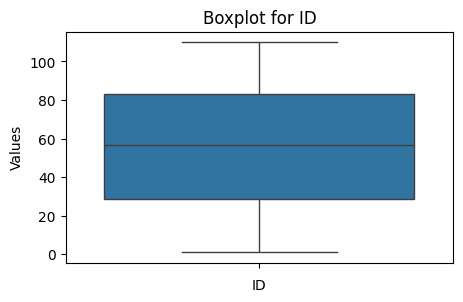

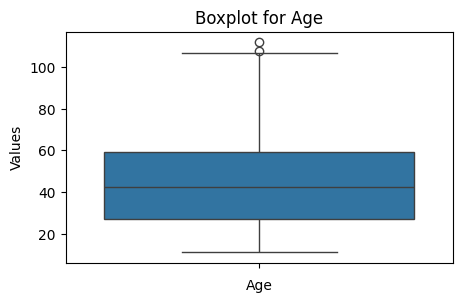

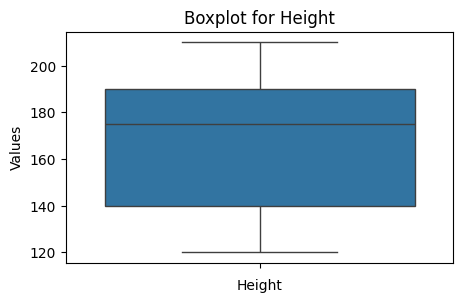

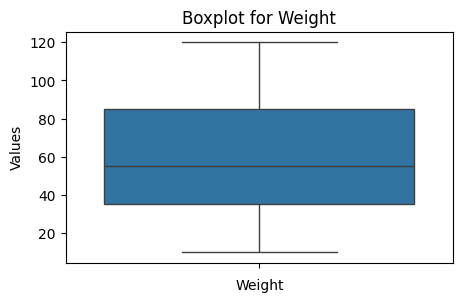

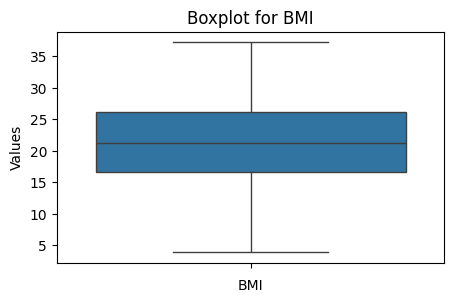

In [ ]:
for col in df.select_dtypes(include=np.number):
  plt.figure(figsize=(5,3))
  sns.boxplot(df[col])
  plt.title(f'Boxplot for {col}')
  plt.xlabel(col)
  plt.ylabel('Values')
  plt.show()

**Observation:**

* There no outliers in height, weight, and BMI columns.
* There are very few outliers in the Age column.

#Data Visualization

**Univariate Analysis**

**Countplot for label column**

<Axes: xlabel='count', ylabel='Label'>

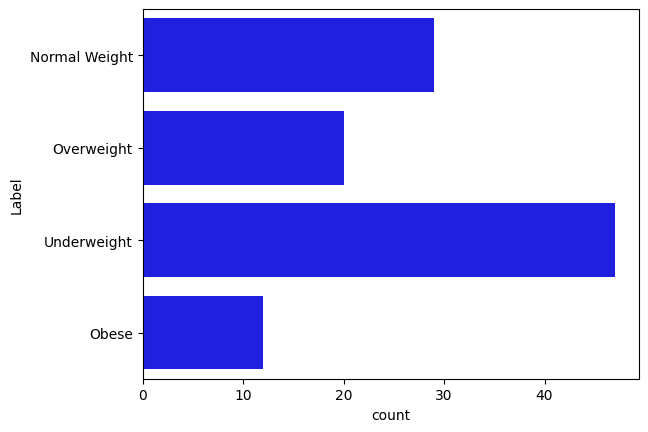

In [ ]:
sns.countplot(df['Label'],color='blue')

**Observations:**
* From the countplot, we can see that the most number of people are underweight,followed by Normal weight and over weight.
* we can observe that number of people underweight are significantly more than obese people.
*  Fewest people are Obese.


**Bi-variate Analysis**

<Axes: xlabel='BMI', ylabel='Label'>

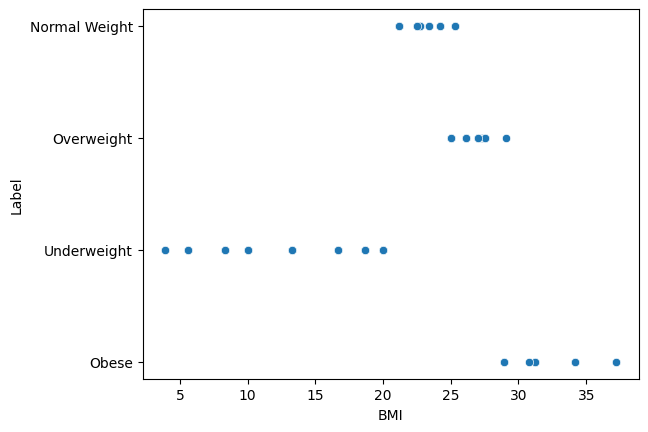

In [ ]:
# Scatter plot of BMI and label.

sns.scatterplot(x='BMI',y='Label',data=df)

**Observations:**

* We can observe that the people with BMI less than or equal to 20 are labeled as Underweight.
* We can Observe that the people with BMI ranges between 22 to 28 are labeled as Normal weight.
* People with around BMI range of 25 to 28 people are labeled as Overweight.
* Finally, the people with BMI range around 28 and above are labeled as Obese.
* This implies BMI is correlated to Labels.

#Preprocessing the data

In [ ]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [ ]:
df.loc[df['Gender']=='Female','Gender']=0
df.loc[df['Gender']=='Male','Gender']=1

In [ ]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,Normal Weight
1,2,30,0,160,60,22.5,Normal Weight
2,3,35,1,180,90,27.3,Overweight
3,4,40,0,150,50,20.0,Underweight
4,5,45,1,190,100,31.2,Obese


**One_hot_Encoding**

In [ ]:
# use label encoder to convert species into numbers

label_encoder = preprocessing.LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [ ]:
#df=pd.get_dummies(df,columns=['Label'])
#df.head()

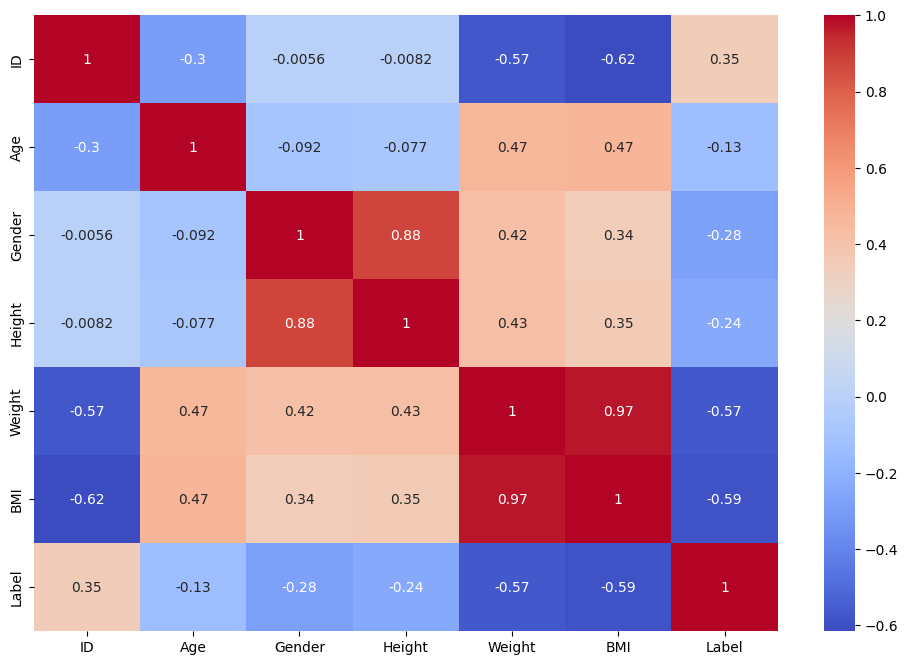

In [ ]:
#Heatmap for correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

**Observations:**
* From the above heatmap we can observe that weight and BMI has strong positive correlation.
* Height and Gender columns are also positively correlated.
* Weight and BMI columns has negative correlation with Label.

# Model Building

In [ ]:
#Dropping Id column
df=df.drop('ID',axis=1)

In [ ]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,3
4,45,1,190,100,31.2,1


**Separating the independent variables (X) and the dependent variable (Y)**

In [ ]:
X=df.drop('Label',axis=1)
y=df['Label']

In [ ]:
X

,Age,Gender,Height,Weight,BMI
0,25,1,175,80,25.3
1,30,0,160,60,22.5
2,35,1,180,90,27.3
3,40,0,150,50,20.0
4,45,1,190,100,31.2
...,...,...,...,...,...
103,11,1,175,10,3.9
104,16,0,160,10,3.9
105,21,1,180,15,5.6
106,26,0,150,15,5.6


In [ ]:
y

,Label
0,0
1,0
2,2
3,3
4,1
...,...
103,3
104,3
105,3
106,3


**Splitting the data into train and test**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((86, 5), (22, 5), (86,), (22,))

In [ ]:
X_test

,Age,Gender,Height,Weight,BMI
85,23,1,180,30,13.3
10,18,1,175,70,23.4
20,68,1,175,80,25.3
23,83,0,150,50,20.0
63,41,0,140,55,21.2
54,97,1,200,95,27.0
42,37,1,190,85,26.1
56,107,1,210,105,28.9
28,108,1,210,120,37.2
66,56,1,210,95,27.0


In [ ]:
y_test

,Label
85,3
10,0
20,0
23,3
63,0
54,2
42,2
56,1
28,1
66,2


#Building Decision Tree Classifier using Entropy as a Criterion

In [ ]:
model =  DecisionTreeClassifier(criterion='entropy',max_depth = 4)

model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

**Plotting the tree**

[Text(0.3333333333333333, 0.9, 'x[4] <= 20.6\nentropy = 1.806\nsamples = 86\nvalue = [20, 9, 17, 40]'),
 Text(0.16666666666666666, 0.7, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 0, 40]'),
 Text(0.25, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[4] <= 24.6\nentropy = 1.514\nsamples = 46\nvalue = [20, 9, 17, 0]'),
 Text(0.41666666666666663, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0]'),
 Text(0.6666666666666666, 0.5, 'x[3] <= 97.5\nentropy = 1.235\nsamples = 28\nvalue = [2, 9, 17, 0]'),
 Text(0.5, 0.3, 'x[0] <= 28.5\nentropy = 0.485\nsamples = 19\nvalue = [2, 0, 17, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.0\nsamples = 17\nvalue = [0, 0, 17, 0]'),
 Text(0.8333333333333334, 0.3, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0, 0]')]

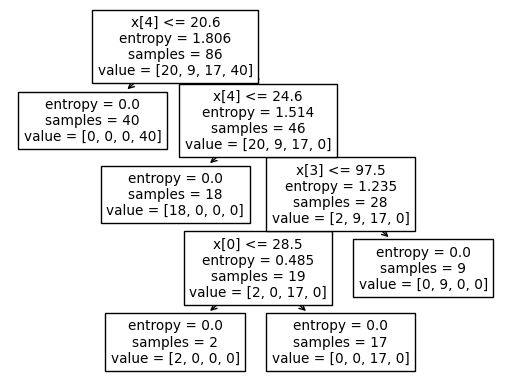

In [ ]:
tree.plot_tree(model)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

[Text(0.3333333333333333, 0.9, 'BMI <= 20.6\nentropy = 1.806\nsamples = 86\nvalue = [20, 9, 17, 40]\nclass = Under_weight'),
 Text(0.16666666666666666, 0.7, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 0, 40]\nclass = Under_weight'),
 Text(0.25, 0.8, 'True  '),
 Text(0.5, 0.7, 'BMI <= 24.6\nentropy = 1.514\nsamples = 46\nvalue = [20, 9, 17, 0]\nclass = Normal_weight'),
 Text(0.41666666666666663, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0]\nclass = Normal_weight'),
 Text(0.6666666666666666, 0.5, 'Weight <= 97.5\nentropy = 1.235\nsamples = 28\nvalue = [2, 9, 17, 0]\nclass = Over_weight'),
 Text(0.5, 0.3, 'Age <= 28.5\nentropy = 0.485\nsamples = 19\nvalue = [2, 0, 17, 0]\nclass = Over_weight'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]\nclass = Normal_weight'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.0\nsamples = 17\nvalue = [0, 0, 17, 0]\nclass = Over_weight'),
 Text(0.8333333333333334, 0.3

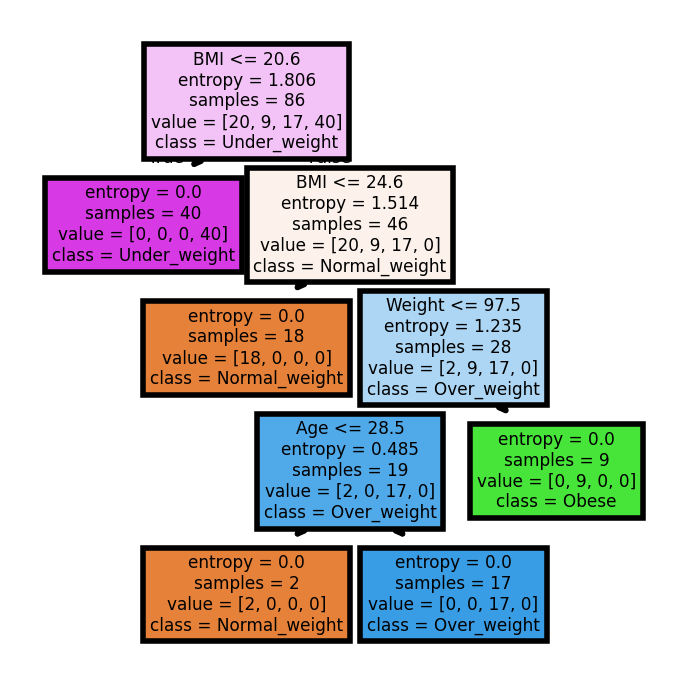

In [ ]:
fn = ['Age', 'Gender', 'Height', 'Weight', 'BMI']
cn = ['Normal_weight','Obese','Over_weight','Under_weight']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=400)
tree.plot_tree(model,feature_names=fn,class_names = cn, filled=True)

In [ ]:
# Taking predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [ ]:
# Model Evaluation on training data
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred, average = 'weighted'), 2))

# Model Evaluation on testing data
print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_pred, average = 'weighted'), 2))

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 0.95
Testing Precision : 0.97
Testing Recall : 0.95
Testing F1 Score : 0.96


**Observations:**

* The model is performing well on both training and testing data.
* As there is slight drop in the accuracy and recall value of testing data, let's check the performance of the model using cross-validation technique.

**Checking the performance using Cross-validation technique**

In [ ]:
from sklearn.model_selection import cross_val_score

   # Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

   # Print the average score
print("Average cross-validation score:", scores.mean())

Average cross-validation score: 0.9636363636363636


#Conclusion:

Conclusion:

* Based on CV score and testing accuracy, the Decision Tree model is performing well and showing good generalization ability.
* While there might be a slight indication of overfitting, it's not a major concern given the high and consistent performance across different data folds.